why are their missing values?(survey)


1.maybe they hesitate to put down the information
2.survey information are not that valid

Data that will be missing --
(1).Continous data ----


(2).categorical data


### what are the diffrent types of missing data ?

###### 1.Missing completely at random, mcar : 

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations .When data is MCAR there is absoultely no relationship between missing data and other values,observed or missing,within the dataset.

    

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df.shape

(418, 12)

In [6]:
df[df['Fare'].isnull()] ##to retrive that particular value (eg of MCAR)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


#### 2 .Missing data not at random (MDNAR) :

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations .When data is MCAR there is absoultely  relationship between missing data and other values,observed or missing,within the dataset.
 eg . age and cabin

In [7]:
import numpy as np
df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

##find percentage of null values
df['Cabin_null'].mean()

0.7822966507177034

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [10]:
df.groupby(['Survived'])['Cabin_null'].mean() 

Survived
0    0.823308
1    0.710526
Name: Cabin_null, dtype: float64

 #### 3. Missing at random (MAR)

men --- hide their salary


women --- hide their age

### handling technique , missing values
1.mean/median replacement
2.Random sample imputation
3.Capturing NaN values with a new feature
4.End of distribution imputation
5.Arbitarary imputation
6.Frequent categories imputation


### mean/median/mode imputation  
when should we apply ??


Mean/Median mputation has assumption that data are misiinf completely at random(MCAR)
Solve this by replacing the NAN with most frequent occurence of the varibles

In [11]:
df = pd.read_csv("tested.csv" , usecols = ['Age','Fare','Survived'])

In [12]:
df

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [13]:
###percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.205742
Fare        0.002392
dtype: float64

In [14]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [15]:
median=df.Fare.median()
median1=df.Age.median()
print(median)
print(median1)

14.4542
27.0


In [16]:
impute_nan(df,"Fare",median)

In [17]:
impute_nan(df,"Age",median)

In [18]:
df.isnull().sum()

Survived        0
Age            86
Fare            1
Fare_median     0
Age_median      0
dtype: int64

In [19]:
df.head()

,Survived,Age,Fare,Fare_median,Age_median
0,0,34.5,7.8292,7.8292,34.5
1,1,47.0,7.0000,7.0000,47.0
2,0,62.0,9.6875,9.6875,62.0
3,0,27.0,8.6625,8.6625,27.0
4,1,22.0,12.2875,12.2875,22.0


In [20]:
print(df["Age"].std())

14.18120923562442


In [22]:
print(df["Age_median"].std())

14.163993193006458


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

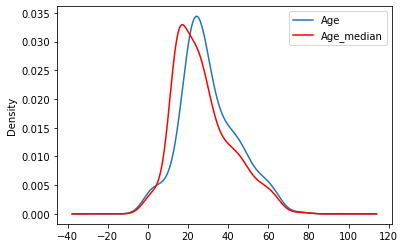

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
df["Age"].plot(kind = 'kde',ax = ax)
df.Age_median.plot(kind = 'kde',ax = ax,color = "red")
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')

### Advantages and Disadvantages of mode/median

### advantages

1.Easy to implement

2.Faster way to obtain the complete dataset

### Disadvantage
1.change or distortion in the original variance/std


## Random sample imputation
Aim: Random sample imputation consist of taking random observation from the dataset and use this observation to replace the nan values


When should it be used ?

It assumes that the data are missing completely at random

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("tested.csv" , usecols = ["Age","Fare","Survived"])

In [3]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [4]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [5]:
df.isnull().mean()

Survived    0.000000
Age         0.205742
Fare        0.002392
dtype: float64

In [8]:
df["Age"].isnull().sum()

86

In [12]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state = 0) ##it's picking any one value

62     18.0
67     47.0
66     18.0
239    48.0
181    37.0
       ... 
259    21.0
5      14.0
38     25.0
394    29.0
40     39.0
Name: Age, Length: 86, dtype: float64

In [30]:
def impute_nan(df,variable,median):
    df[variable+"median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ## it will have random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state = 0)
    ##pandas need to have the same index in order to merge the dataset
    random_sample.index =df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable + "_random"]=random_sample
    

In [31]:
median = df["Age"].median()
median
impute_nan(df,"Age",median)

In [34]:
df.head()

,Survived,Age,Fare,Agemedian,Agerandom,Age_random
0,0,34.5,7.8292,34.5,34.5,34.5
1,1,47.0,7.0000,47.0,47.0,47.0
2,0,62.0,9.6875,62.0,62.0,62.0
3,0,27.0,8.6625,27.0,27.0,27.0
4,1,22.0,12.2875,22.0,22.0,22.0


In [35]:
df["Age_random"].isnull().sum()

0

In [36]:
df["Agemedian"].isnull().sum()

0

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

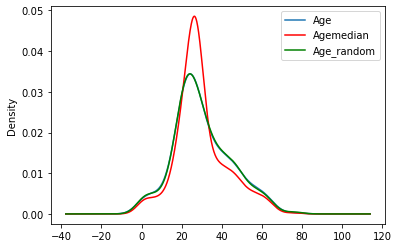

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
df["Age"].plot(kind = 'kde',ax = ax)
df.Agemedian.plot(kind = 'kde',ax = ax,color = "red")
df.Age_random.plot(kind = 'kde',ax = ax,color = "green")
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')

## Advantages
!.Easy to implement
2.There is less distorion in variance

## Disadvantage
1.Every situtation randomness won't work


## Capturing Nan values with a new feature

it works well if the data are not missing completelly at random

In [45]:
df = pd.read_csv("tested.csv" , usecols = ["Age","Fare","Survived"])

In [46]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [51]:
df["Age_NAN"]=np.where(df["Age"].isnull(),1,0)
df["Fare_NAN"]=np.where(df["Fare"].isnull(),1,0)

In [52]:
df

,Survived,Age,Fare,Age_NAN,Fare_NAN
0,0,34.5,7.8292,0,0
1,1,47.0,7.0000,0,0
2,0,62.0,9.6875,0,0
3,0,27.0,8.6625,0,0
4,1,22.0,12.2875,0,0
...,...,...,...,...,...
413,0,NaN,8.0500,1,0
414,1,39.0,108.9000,0,0
415,0,38.5,7.2500,0,0
416,0,NaN,8.0500,1,0


## Advantages
1.Easy to implement
2. Captures the importance of missing values

In [54]:
df["Age"].fillna(df.Age.median(),inplace = True)

In [55]:
df

,Survived,Age,Fare,Age_NAN,Fare_NAN
0,0,34.5,7.8292,0,0
1,1,47.0,7.0000,0,0
2,0,62.0,9.6875,0,0
3,0,27.0,8.6625,0,0
4,1,22.0,12.2875,0,0
...,...,...,...,...,...
413,0,27.0,8.0500,1,0
414,1,39.0,108.9000,0,0
415,0,38.5,7.2500,0,0
416,0,27.0,8.0500,1,0
